In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib
import warnings


Using matplotlib backend: Qt5Agg


In [2]:
warnings.filterwarnings("ignore")


In [3]:
train=pd.read_csv("D:/Data Science Projects Data/Time series Analysis/train.csv")
test=pd.read_csv("D:/Data Science Projects Data/Time series Analysis/test.csv")

In [4]:
train_original=train.copy()
test_original=test.copy()


In [5]:
train.columns

Index(['ID', 'Datetime', 'Count'], dtype='object')

In [6]:
test.columns

Index(['ID', 'Datetime'], dtype='object')

In [7]:
train.dtypes

ID           int64
Datetime    object
Count        int64
dtype: object

In [8]:
test.dtypes

ID           int64
Datetime    object
dtype: object

In [9]:
#Now see the shape of the data
train.shape,test.shape

((18288, 3), (5112, 2))

In [10]:
"""Feature Extraction
we will extract date and time from the Datetime columns.To do this we have to change datatype 
of DateTime object to Datetime type"""



'Feature Extraction\nwe will extract date and time from the Datetime columns.To do this we have to change datatype \nof DateTime object to Datetime type'

In [11]:

train['Datetime']=pd.to_datetime(train.Datetime,format="%d-%m-%Y %H:%M")

In [12]:
train.dtypes

ID                   int64
Datetime    datetime64[ns]
Count                int64
dtype: object

In [13]:

test['Datetime']=pd.to_datetime(test.Datetime,format="%d-%m-%Y %H:%M")
test_original['Datetime']=pd.to_datetime(test_original.Datetime,format="%d-%m-%Y %H:%M")
train_original['Datetime']=pd.to_datetime(train_original.Datetime,format="%d-%m-%Y %H:%M")

In [14]:
test.dtypes

ID                   int64
Datetime    datetime64[ns]
dtype: object

In [15]:
"""We have made some hypothesis for the effect of hour,day,month and year on the passenger 
count.let's extract these feature from the data"""
for i in (train,test,train_original,test_original):
    i['Year']=i.Datetime.dt.year
    i['Month']=i.Datetime.dt.month
    i['Day']=i.Datetime.dt.day
    i['Hour']=i.Datetime.dt.hour
    

In [16]:
"""we have made hypothesis of Weekdays and weekends as well.So lets make a weekend variable to visualize 
the impact of weekend on the traffic"""
"""We will first extract the day of week from Datetime and then based on the values we will assign whether 
the day is a weekend or not.

Values of 5 and 6 represents that the days are weekend."""

train['Day of week']=train['Datetime'].dt.dayofweek
temp=train['Datetime']


In [17]:
train.tail()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3


In [18]:
#Lets aasign 1 if the day of week is a weekend or 0 if the day is not a weekend.
def applyer(row):
    if row.dayofweek==5 or row.dayofweek==6:
          return 1
        
    else:
        return 0
     
temp2=train['Datetime'].apply(applyer)
train['weekend']=temp2
  

    

In [19]:
train.tail()

,ID,Datetime,Count,Year,Month,Day,Hour,Day of week,weekend
18283,18283,2014-09-25 19:00:00,868,2014,9,25,19,3,0
18284,18284,2014-09-25 20:00:00,732,2014,9,25,20,3,0
18285,18285,2014-09-25 21:00:00,702,2014,9,25,21,3,0
18286,18286,2014-09-25 22:00:00,580,2014,9,25,22,3,0
18287,18287,2014-09-25 23:00:00,534,2014,9,25,23,3,0


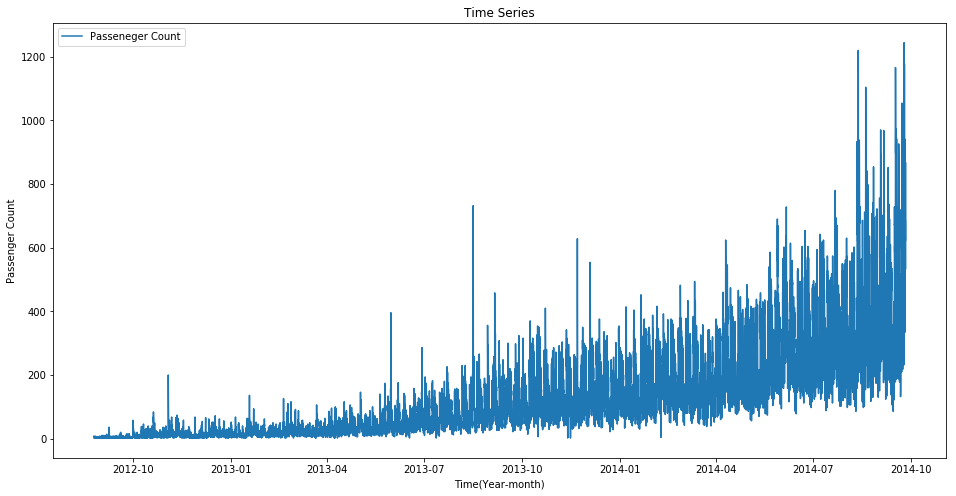

In [20]:
"Lets look at time series"
train.index=train['Datetime']
df=train.drop('ID',1)
ts=df['Count']
plt.figure(figsize=(16,8))
plt.plot(ts,label='Passeneger Count')
plt.title('Time Series')
plt.xlabel('Time(Year-month)')
plt.ylabel('Passenger Count')
plt.legend(loc='best')

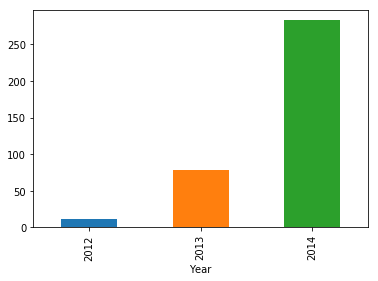

In [21]:
"""Our first Hypothesis that traffic will increase as the years pass by.so let's look at the yearly passenger"""
train.groupby('Year')['Count'].mean().plot.bar()

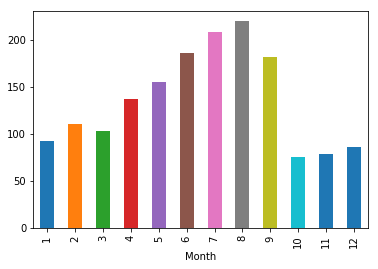

In [22]:
"""We see an exponential growth in the traffic with respect to year which validates our hypothesis."""
"""Our Next Hypothesis was about increase in traffic from May-October.lets look at that data"""
train.groupby('Month')['Count'].mean().plot.bar()

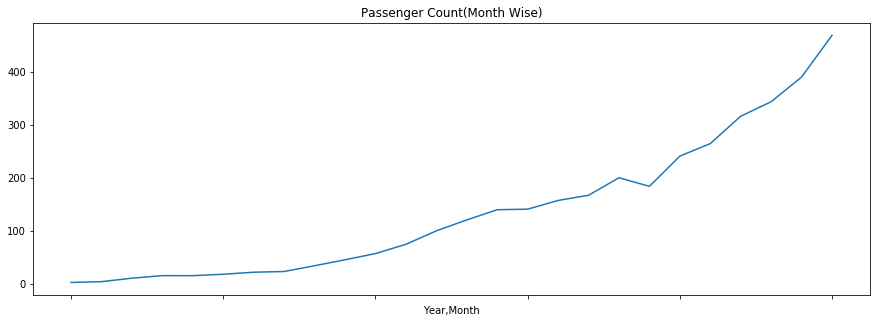

In [23]:
"""Here we see a decrease in the mean of passenger count in last three months.
This does not look right. Let’s look at the monthly mean of each year separately."""
temp=train.groupby(['Year','Month'])['Count'].mean()
temp.plot(figsize=(15,5),title="Passenger Count(Month Wise)")


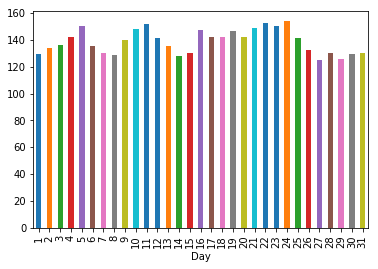

In [24]:
train.groupby('Day')['Count'].mean().plot.bar()

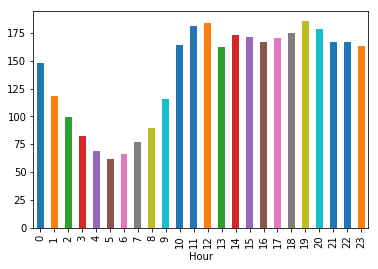

In [25]:
train.groupby('Hour')['Count'].mean().plot.bar()

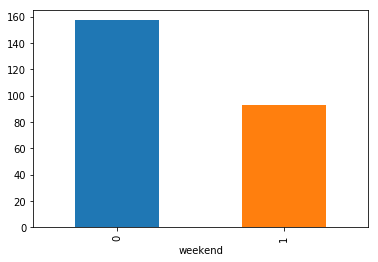

In [26]:
train.groupby('weekend')['Count'].mean().plot.bar()

In [27]:
"""It can be inferred from the above plot that the traffic is more on weekdays as compared to 
weekends which validates our hypothesis."""


'It can be inferred from the above plot that the traffic is more on weekdays as compared to \nweekends which validates our hypothesis.'

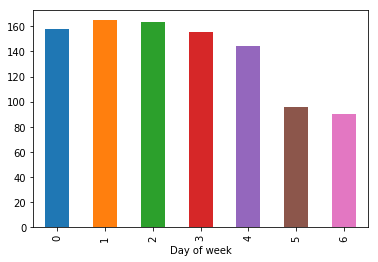

In [28]:
train.groupby('Day of week')['Count'].mean().plot.bar()

In [29]:
"""From the above bar plot, we can infer that the passenger count is less for 
saturday and sunday as compared to the other days of the week. Now we will look at basic modeling techniques.
Before that we will drop the ID variable as it has nothing to do with the passenger count."""

train=train.drop('ID',1)

In [30]:
"""As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily,
weekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn."""

'As we have seen that there is a lot of noise in the hourly time series, we will aggregate the hourly time series to daily,\nweekly, and monthly time series to reduce the noise and make it more stable and hence would be easier for a model to learn.'

In [31]:
train.Timestamp=pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M')
train.index=train.Timestamp
#Hourly Time Series
hourly=train.resample('H').mean()
#Coverting t daily mean
daily=train.resample('D').mean()
#Converting to weeky mean
weekly=train.resample('W').mean()
#Converting to monthly mean
monthly=train.resample('M').mean()


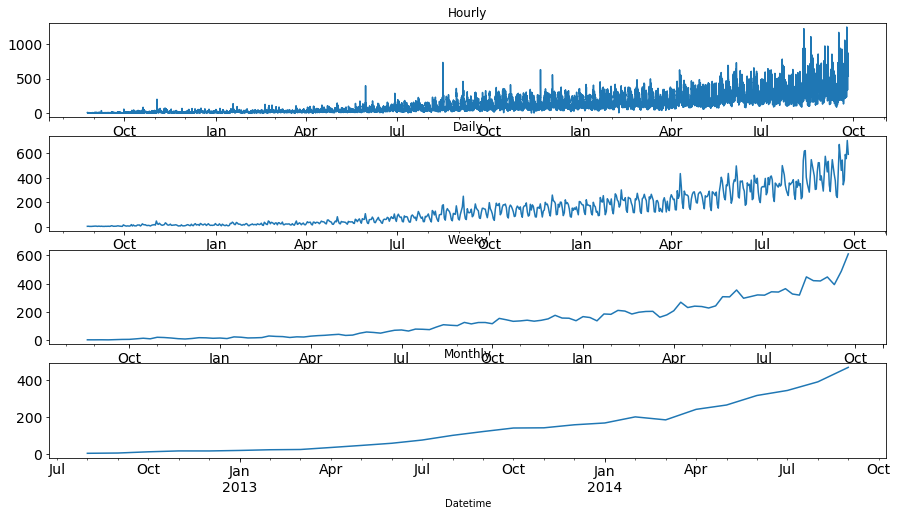

In [32]:
#lets look at the daily ,monthly and weekly time series
fig,axis=plt.subplots(4,1)
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axis[0])
daily.Count.plot(figsize=(15,8),title='Daily',fontsize=14,ax=axis[1])
weekly.Count.plot(figsize=(15,8),title='Weeky',fontsize=14,ax=axis[2])
monthly.Count.plot(figsize=(15,8),title='Monthly',fontsize=14,ax=axis[3])
plt.show()


In [33]:
"""We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.

But it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to 
convert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become 
very expanded process. So, we will work on the daily time series."""

'We can see that the time series is becoming more and more stable when we are aggregating it on daily, weekly and monthly basis.\n\nBut it would be difficult to convert the monthly and weekly predictions to hourly predictions, as first we have to \nconvert the monthly predictions to weekly, weekly to daily and daily to hourly predictions, which will become \nvery expanded process. So, we will work on the daily time series.'

In [34]:
test.dtypes




ID                   int64
Datetime    datetime64[ns]
Year                 int64
Month                int64
Day                  int64
Hour                 int64
dtype: object

In [35]:
test.Timestamp = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp 

# Converting to daily mean
test = test.resample('D').mean()

train.Timestamp = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp

# Converting to daily mean
train = train.resample('D').mean()

In [37]:
 #Splitting the data into training and validation part
Train=train.ix['2012-08-25':'2014-06-24']
valid=train.ix['2014-06-25':'2014-09-25']

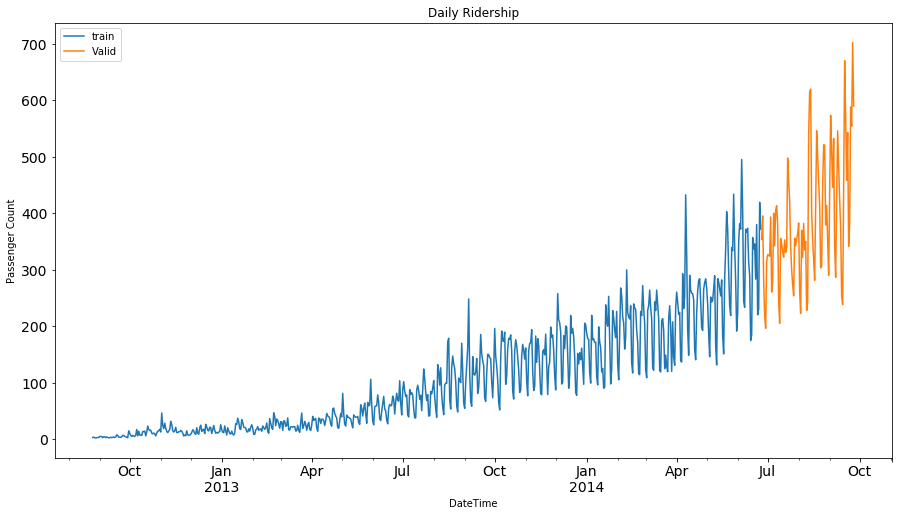

In [42]:
Train.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='train')
valid.Count.plot(figsize=(15,8),title='Daily Ridership',fontsize=14,label='Valid')
plt.xlabel("DateTime")
plt.ylabel("Passenger Count")
plt.legend(loc='best')
plt.show()

In [43]:
"""Here the blue part represents the train data and the orange part represents the validation data.
We will predict the traffic for the validation part and then visualize how accurate our predictions are.
Finally we will make predictions for the test dataset."""


'Here the blue part represents the train data and the orange part represents the validation data.\nWe will predict the traffic for the validation part and then visualize how accurate our predictions are.\nFinally we will make predictions for the test dataset.'

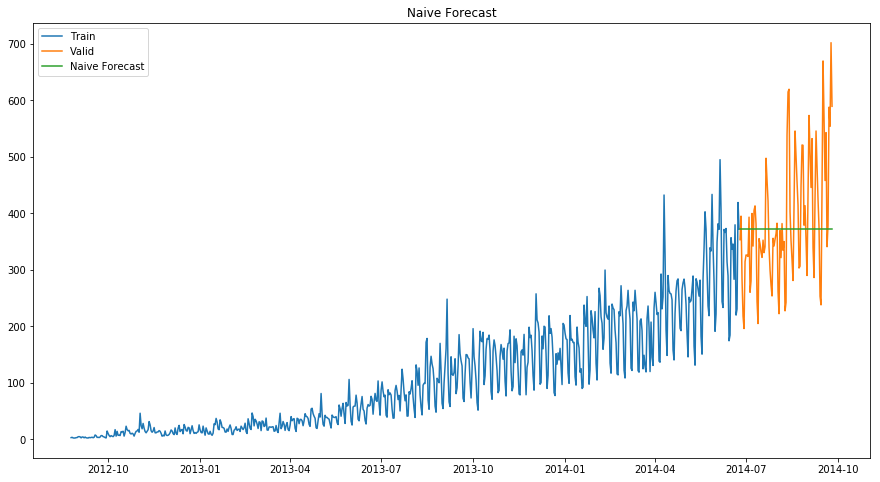

In [44]:
#Let’s make predictions using naive approach for the validation set.
dd=np.asarray(Train.Count)
y_hat=valid.copy()
y_hat['Naive']=dd[len(dd)-1]
plt.figure(figsize=(15,8))
plt.plot(Train.index,Train['Count'],label='Train')
plt.plot(valid.index,valid['Count'],label='Valid')
plt.plot(y_hat.index,y_hat['Naive'],label='Naive Forecast')
plt.legend(loc='best')
plt.title('Naive Forecast')
plt.show()

In [45]:
#We will now calculate RMSE to check the accuracy of our model on validation data set.
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(valid.Count,y_hat.Naive))


In [46]:
rms

111.79050467496724

In [47]:
"""We can infer that this method is not suitable for datasets with high variability. 
We can reduce the rmse value by adopting different techniques."""


'We can infer that this method is not suitable for datasets with high variability. \nWe can reduce the rmse value by adopting different techniques.'

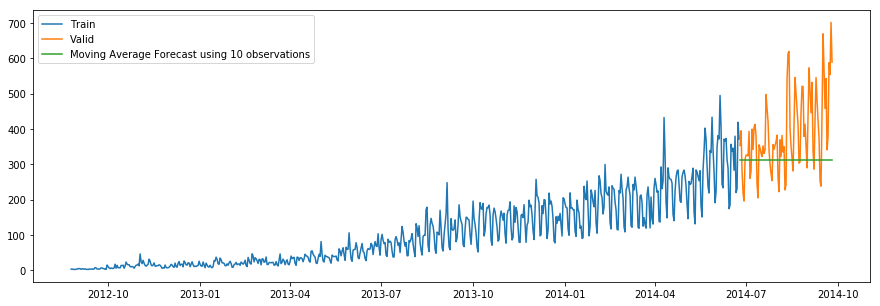

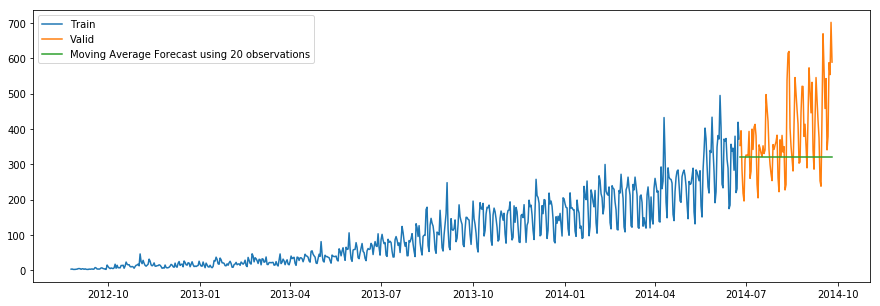

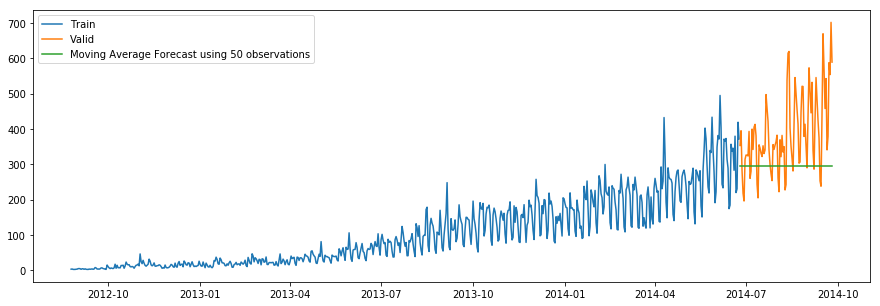

In [48]:
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations.
plt.figure(figsize=(15,5)) 
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 10 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 20 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 20 observations')
plt.legend(loc='best')
plt.show()
y_hat_avg = valid.copy()
y_hat_avg['moving_avg_forecast'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 50 observations.
plt.figure(figsize=(15,5))
plt.plot(Train['Count'], label='Train')
plt.plot(valid['Count'], label='Valid')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast using 50 observations')
plt.legend(loc='best')
plt.show()

In [49]:
"""We took the average of last 10, 20 and 50 observations and predicted based on that. This value can be changed in the above code in .rolling().mean() part. We can see that the predictions are getting weaker 
as we increase the number of observations."""

'We took the average of last 10, 20 and 50 observations and predicted based on that. This value can be changed in the above code in .rolling().mean() part. We can see that the predictions are getting weaker \nas we increase the number of observations.'

In [50]:
rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.moving_avg_forecast))

In [51]:
rms

144.19175679986802